# 10 - MODELO DE EJECUCIÓN CON LOS DATOS DE PRUEBA

En este notebook vamos a cargar el dataset de prueba y realizaremos la calidad de datos, separaremos predictoras y target, predeciremos sobre los datos de prueba y evaluaremos el modelo definitivo.

## IMPORTAR LOS PAQUETES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skplt

#metricas de evaluación
from sklearn.metrics import roc_auc_score, PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## CARGAR LOS DATOS

In [2]:
df = pd.read_csv('../../02_Datos/02_Validacion/prueba.csv', index_col= 0)
df.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
67,-0.33,0.50,1,0,0,1,1.0,-1,0.47,N
15,1.00,0.81,1,1,0,0,1.0,1,0.50,N
41,-1.00,0.56,1,1,0,0,0.8,1,0.50,N
13,1.00,0.81,1,0,0,0,1.0,-1,0.38,N
48,-0.33,0.64,1,1,1,0,0.8,-1,0.31,N


## ESTRUCTURA DEL DATASET

### CALIDAD DE DATOS

In [3]:
# Cambio los valores manualmente
df['produccion'] = df.produccion.replace({'N': 0, 'O':1 })
df.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
67,-0.33,0.50,1,0,0,1,1.0,-1,0.47,0
15,1.00,0.81,1,1,0,0,1.0,1,0.50,0
41,-1.00,0.56,1,1,0,0,0.8,1,0.50,0
13,1.00,0.81,1,0,0,0,1.0,-1,0.38,0
48,-0.33,0.64,1,1,1,0,0.8,-1,0.31,0


### SEPARAR PREDICTORAS Y TARGET

In [4]:
target = 'produccion'
x = df.drop(columns= target).copy()
y = df.produccion.copy()

In [5]:
df[df.produccion == 1]

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
84,-0.33,0.78,1,0,0,1,1.0,1,0.06,1
29,1.00,0.67,0,0,1,0,0.6,0,0.50,1
23,1.00,0.69,1,0,1,-1,1.0,-1,0.44,1


## MODELIZAR CON EL PIPE DE EJECUCIÓN

### CARGAMOS EL PIPE DE EJECUCIÓN

In [6]:
modelo = pd.read_pickle('../../04_Modelos/pipe_ejecucion.pickle')

## PREDECIR Y EVALUAR CON DATASET DE PRUEBA

### PREDECIR SOBRE LOS DATOS

In [7]:
pred = modelo.predict(x)
pred_proba = modelo.predict_proba(x)[:,1]

### EVALUAR SOBRE LOS DATOS

In [8]:
v_roc_auc_proba = roc_auc_score(y, pred_proba)
v_roc_auc = roc_auc_score(y, pred)
v_accuracy = accuracy_score(y, pred)
v_report = classification_report(y, pred)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:\n{v_report}")

Roc AUC_proba: 0.728395061728395
Roc AUC: 0.6296296296296295
Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.33      0.33      0.33         3

    accuracy                           0.87        30
   macro avg       0.63      0.63      0.63        30
weighted avg       0.87      0.87      0.87        30



In [22]:
modelo.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
        

## REPORTING DEL MODELO

Matrix de Confusión MultiClass

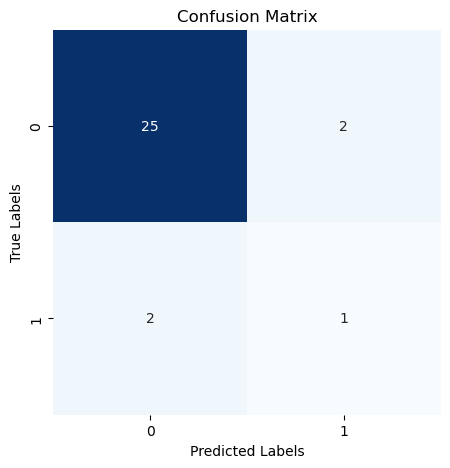

In [9]:
# Calcular la matriz de confusión
cm = confusion_matrix(y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Precision-Recall

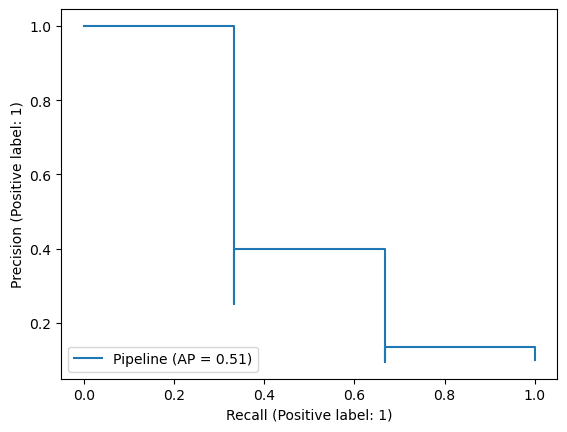

In [14]:
PrecisionRecallDisplay.from_estimator(modelo, x, y);

El mejor best_threshold: 0.40465593


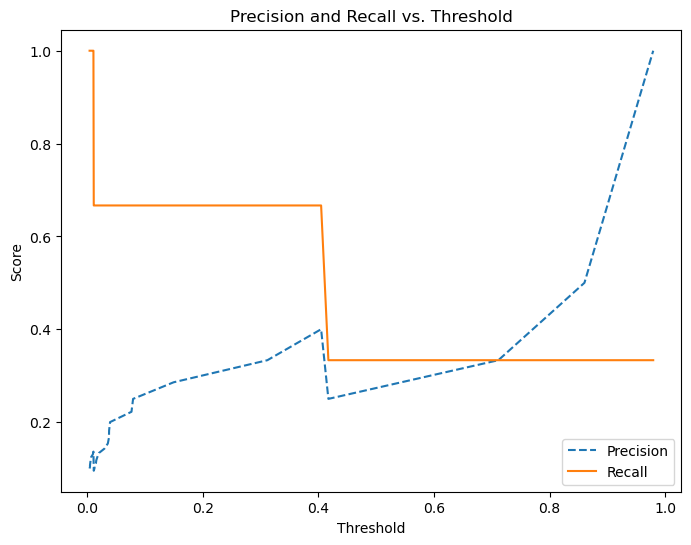

In [15]:
# Calcula la curva de precisión y recall para diferentes umbrales de corte
precision, recall, thresholds = precision_recall_curve(y, pred_proba)

# Grafica la relación entre la precisión y el recall en función del umbral de corte
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs. Threshold')

# Encuentra el umbral que maximiza F1-score (o ajusta según tus necesidades)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("El mejor best_threshold:", best_threshold)

### ROC Chart

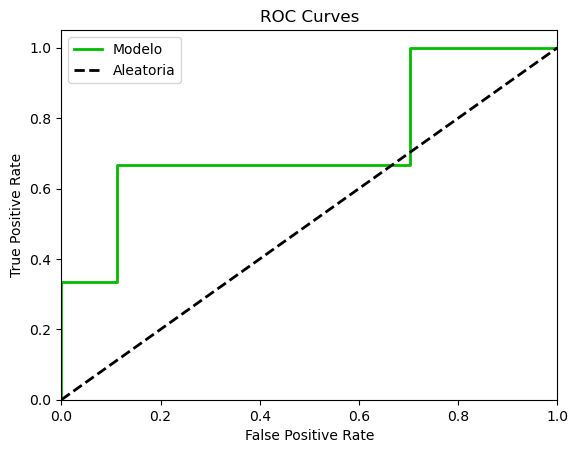

In [10]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(y, modelo.predict_proba(x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()            
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

## ESTABLECER UMBRAL DE CORTE

In [32]:
#Indicamos el umbral de corte establecido con el modelo.

umbral_corte = 0.64831114


Umbral de corte: 0.64831114
accuracy: 0.867
precision: 0.333
recall: 0.333
F1: 0.333


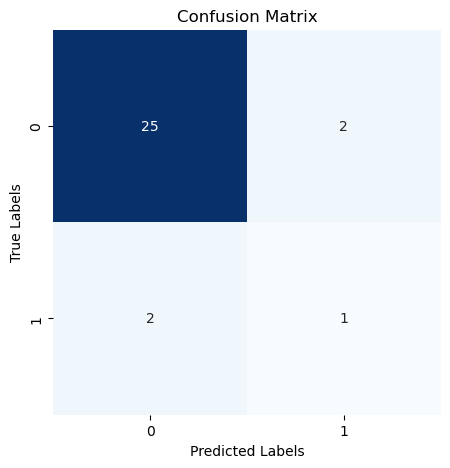

In [33]:
def calcular_metricas(real, scoring, umbral):
    
    #CALCULAR LA DECISION SEGUN EL UMBRAL
    predicho = np.where(scoring > umbral,1,0) 
    
    #CALCULAR TODAS LAS MÉTRICAS
    conf = confusion_matrix(real,predicho)

    tn, fp, fn, tp = conf.ravel()

    total_casos = y.shape[0]
    
    accuracy = (tn + tp) / total_casos
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)

    #IMPRIMIR RESULTADOS
    # Crear un mapa de calor de la matriz de confusión
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf, annot=True, cmap="Blues", fmt="d", cbar=False)
    # Configurar etiquetas y título del gráfico
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix");
    print('\nUmbral de corte:', umbral)
    print('accuracy:',round(accuracy,3))
    print('precision:',round(precision,3))
    print('recall:',round(recall,3))
    print('F1:',round(F1,3))

calcular_metricas(y, pred_proba, umbral_corte)

**CONCLUSIÓN:** El modelo con los datos de entrenamiento ha dado muy buenos resultados obteniendo un AUC [1] del 98.2%.

- Roc AUC_proba: 0.9822628325718893
- Roc AUC: 0.9508196721311476
- Accuracy: 0.9508196721311475
- Classification Report:              
  
        precision    recall  f1-score   support

           0          0.98      0.92      0.95        61
           1          0.92      0.98      0.95        61

        accuracy                          0.95       122

Al predecir con datos de prueba (nuevos) el modelo no ha funcionado tan bien solo hemos podido . No podemos establecer que sea un mal modelo, pero necesitaríamos disponer de más datos para obtener un modelo más eficiente. 

**Modelo definitivo** 

- Roc AUC_proba: 0.728395061728395
- Roc AUC: 0.6296296296296295
- Accuracy: 0.8666666666666667
- Classification Report:
        precision      recall  f1-score   support

           0           0.93      0.93      0.93        27
           1           0.33      0.33      0.33         3

En este caso, tendríamos valorar la opción de negocio y para que utilizaremos los datos:

**Alto Umbral**

Ej. Farmacéutica: queremos probar medicación con pacientes con baja cualidad seminal, subiría el umbral para detectar solo aquellos casos que estemos seguros que son pacientes reales con baja cualidad. 

**Bajo Umbral**

Ej. Nutricionista: Tenemos una dieta que mejora la cualidad seminal de los pacientes y queremos ofrecérselo a nuestros clientes. Nos interesa como empresa ofrecer al mayor número de clientes el producto aunque sean falsos positivos ya que mejoría su cualidad y llegaríamos a más clientes.





